In [184]:
# Usando NLTK para contar palavras mais comuns
# bow = bag of words

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [150]:
yelp = pd.read_csv('yelp.csv')

In [151]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [152]:
yelp['tamanho'] = yelp['text'].apply(len)

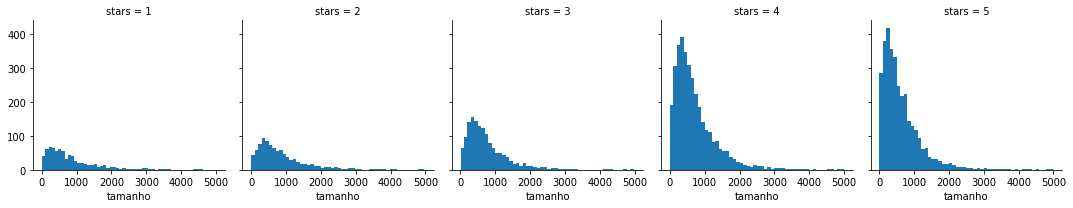

In [153]:
# verificando para cada nivel de estrelas a qtd de letras 
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'tamanho', bins = 50)

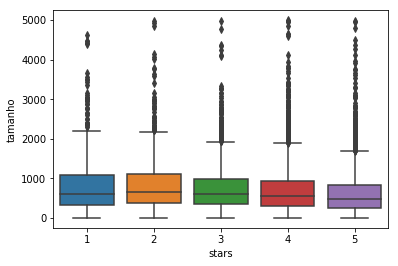

In [154]:
sns.boxplot('stars', 'tamanho', data = yelp)

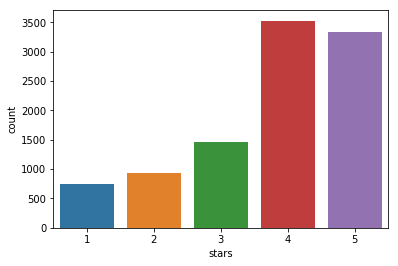

In [155]:
sns.countplot('stars', data = yelp)

In [156]:
yelp.groupby(by='stars').mean()

,cool,useful,funny,tamanho
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


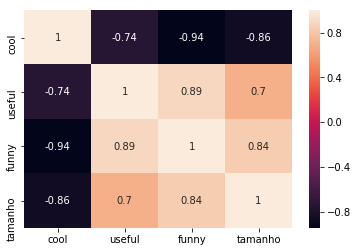

In [157]:
sns.heatmap(stars.corr(), annot=True)

In [158]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'tamanho'],
      dtype='object')

In [159]:
yelp_class = yelp[((yelp['stars'] == 5) | (yelp['stars'] == 1))]

In [160]:
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [161]:
# estamos tokenizando aqui
count_vectorizer = CountVectorizer()

In [162]:
count_vectorizer.fit(yelp_class.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [163]:
count_vectorizer_transformer = count_vectorizer.transform(yelp_class.text)

In [164]:
# Aqui estamos jogando na fórmula do TFIDF
tfidf = TfidfTransformer()

In [165]:
tfidf.fit(count_vectorizer_transformer)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [166]:
tfidf_bow_transformer = tfidf.transform(count_vectorizer_transformer)

In [167]:
print(tfidf_bow_transformer)

  (0, 19077)	0.08951265461934695
  (0, 19066)	0.06622648755374887
  (0, 18826)	0.06458019835849602
  (0, 18735)	0.0851842985244348
  (0, 18698)	0.08617600100688819
  (0, 18674)	0.0648319380107111
  (0, 18672)	0.051861984050418156
  (0, 18663)	0.04595741027729103
  (0, 18585)	0.10982481560294714
  (0, 18517)	0.2534006020922845
  (0, 18440)	0.08740375508004294
  (0, 18432)	0.06206987356529697
  (0, 18200)	0.10923198249255536
  (0, 18192)	0.09872368273435814
  (0, 18100)	0.07815761193619283
  (0, 18042)	0.046355563411668924
  (0, 17667)	0.1233800009966854
  (0, 17406)	0.06893109256756408
  (0, 17346)	0.09911891271114348
  (0, 17344)	0.02362433227717681
  (0, 17163)	0.03310334572494354
  (0, 17137)	0.05349900625320795
  (0, 17134)	0.17836202775778873
  (0, 17126)	0.20738270407707843
  (0, 16913)	0.07455170815134718
  :	:
  (4085, 9116)	0.12301138625537562
  (4085, 9097)	0.10860346820427218
  (4085, 8853)	0.12130480913514378
  (4085, 7990)	0.06906634500131581
  (4085, 7635)	0.05203772947570

In [168]:
X = tfidf_bow_transformer
y = yelp_class.stars

In [176]:
# dividindo a base
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [177]:
# analisando os resultados
classificador = MultinomialNB()

In [178]:
classificador.fit(X_treino, y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [179]:
predicao = classificador.predict(X_teste)

In [180]:
print(classification_report(y_teste, predicao))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       150
           5       0.82      1.00      0.90       668

   micro avg       0.82      0.82      0.82       818
   macro avg       0.41      0.50      0.45       818
weighted avg       0.67      0.82      0.73       818



C:\Users\robson.macedo\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\robson.macedo\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\robson.macedo\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [181]:
print(confusion_matrix(y_teste, predicao))

[[  0 150]
 [  0 668]]


In [183]:
# tentando outro modelo com pipeline sem utilizar o TFIDF

In [185]:
pipeline = Pipeline([('bow', CountVectorizer()), 
                    ('mult', MultinomialNB())])

In [187]:
# aqui temos que usar os dados iniciais, SEM TRANSFORMAÇÃO
X = yelp_class.text
y = yelp_class.stars

In [188]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [189]:
pipeline.fit(X_treino, y_treino)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('mult', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [191]:
predicao_pipeline = pipeline.predict(X_teste)

In [193]:
print(confusion_matrix(y_teste, predicao_pipeline))

[[110  40]
 [ 10 658]]


In [194]:
print(classification_report(y_teste, predicao_pipeline))

              precision    recall  f1-score   support

           1       0.92      0.73      0.81       150
           5       0.94      0.99      0.96       668

   micro avg       0.94      0.94      0.94       818
   macro avg       0.93      0.86      0.89       818
weighted avg       0.94      0.94      0.94       818



In [195]:
# ou seja, sem fazer o TFIDF o modelo conseguiu prever melhor do que com. 
# Devemos testar todas as formas e tentar entender bem de estatística para melhorar as previsões